# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

import os
for dirname, _, filenames in os.walk('heart disease.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# UNDERSTANDING THE DATASET

In [2]:
df=pd.read_csv("heart disease.csv")
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [4]:
df.describe()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


# VISUALIZATION 

Have Heart Disease:  150
Not Have Heart Disease :  120


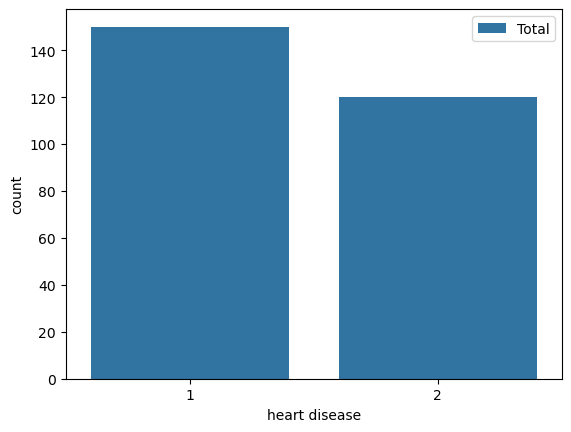

In [5]:
y=df['heart disease']
plot_sb = sns.countplot(df,x=y, label='Total')
Rain, NotRain =y.value_counts()
print('Have Heart Disease: ',Rain)
print('Not Have Heart Disease : ',NotRain)

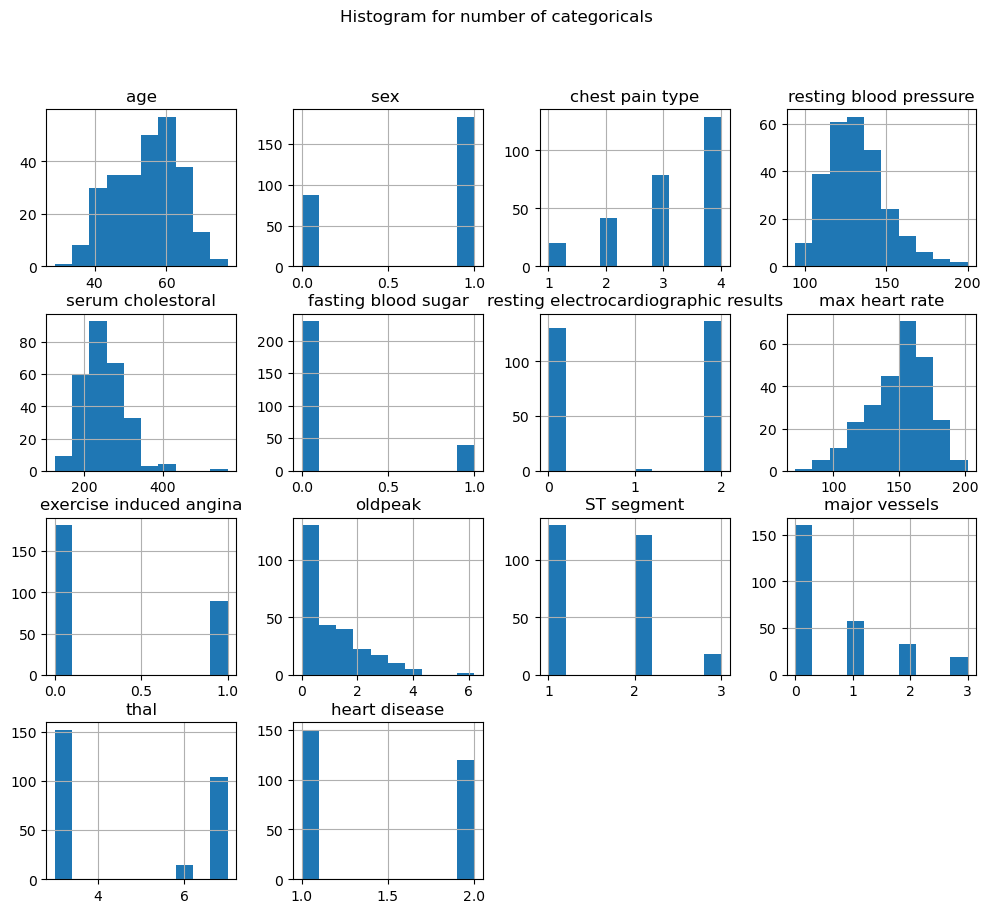

In [6]:
df.hist(figsize=(12, 10))
plt.suptitle('Histogram for number of categoricals')
plt.show()

In [7]:
print(df.columns.str.strip()) 

Index(['age', 'sex', 'chest pain type', 'resting blood pressure',
       'serum cholestoral', 'fasting blood sugar',
       'resting electrocardiographic results', 'max heart rate',
       'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels',
       'thal', 'heart disease'],
      dtype='object')


# PRE-PROCESSING

In [8]:
sex=LabelEncoder()
cpt=LabelEncoder()
recg=LabelEncoder()
ea=LabelEncoder()
st=LabelEncoder()

In [9]:
df['sex ']=sex.fit_transform(df['sex '])
df['chest pain type']=cpt.fit_transform(df['chest pain type'])
df['resting electrocardiographic results']=recg.fit_transform(df['resting electrocardiographic results'])
df['exercise induced angina']=ea.fit_transform(df['exercise induced angina'])
df['ST segment']=st.fit_transform(df['ST segment'])

<Axes: >

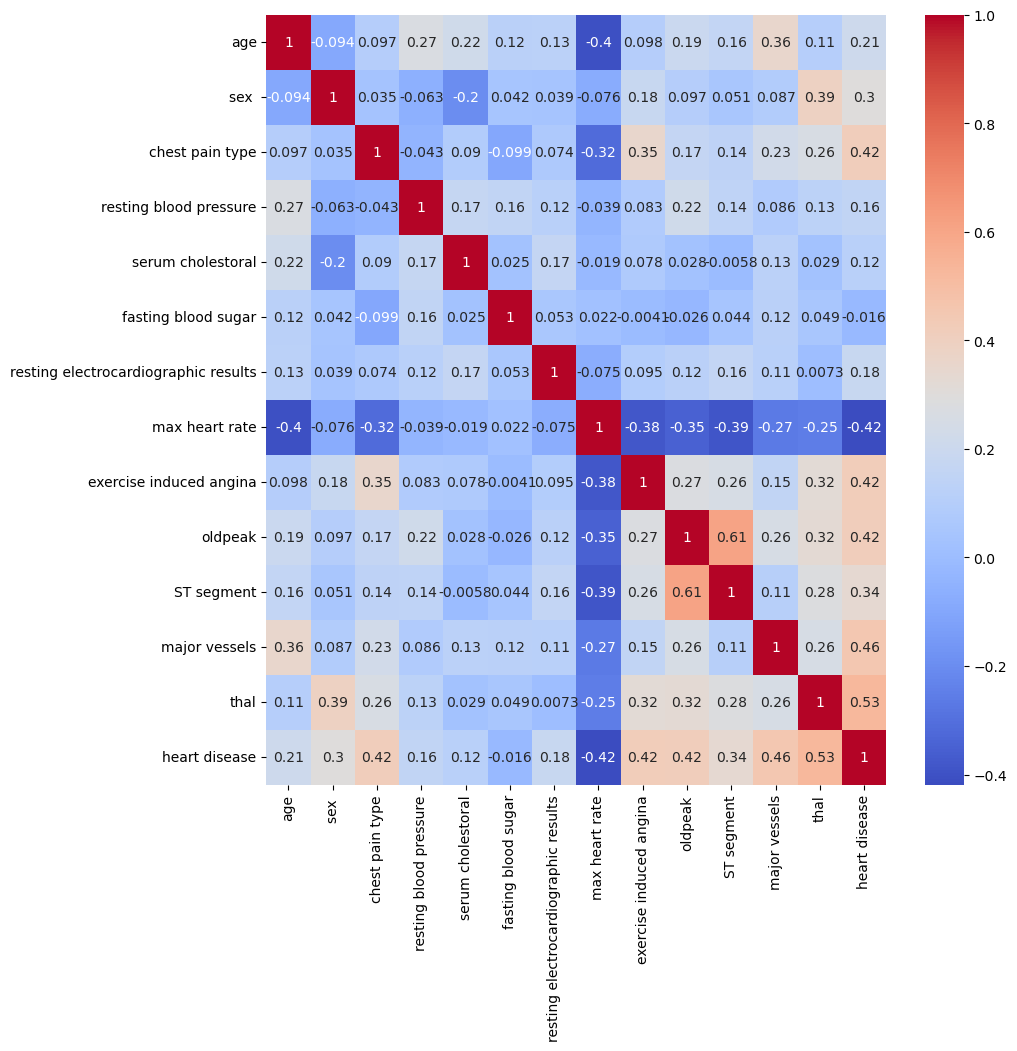

In [10]:
corr_matrix=df.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [11]:
thresh_hold=0.2
select_feat=corr_matrix.index[abs(corr_matrix['heart disease'])>=thresh_hold].to_list()
select_feat.remove('heart disease')
print(select_feat)

['age', 'sex ', 'chest pain type', 'max heart rate', 'exercise induced angina', 'oldpeak', 'ST segment', 'major vessels', 'thal']


In [12]:
selected_features=df[select_feat]
selected_features.head()

,age,sex,chest pain type,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal
0,70,1,3,109,0,2.4,1,3,3
1,67,0,2,160,0,1.6,1,0,7
2,57,1,1,141,0,0.3,0,0,7
3,64,1,3,105,1,0.2,1,1,7
4,74,0,1,121,1,0.2,0,1,3


In [13]:
target=df['heart disease']
target

0      2
1      1
2      2
3      1
4      1
      ..
265    1
266    1
267    1
268    1
269    2
Name: heart disease, Length: 270, dtype: int64

In [14]:
scaler=StandardScaler()
selected_features=scaler.fit_transform(selected_features)
selected_features

array([[ 1.71209356,  0.6894997 ,  0.87092765, ...,  0.67641928,
         2.47268219, -0.87570581],
       [ 1.38213977, -1.45032695, -0.18355874, ...,  0.67641928,
        -0.71153494,  1.18927733],
       [ 0.2822938 ,  0.6894997 , -1.23804513, ..., -0.95423434,
        -0.71153494,  1.18927733],
       ...,
       [ 0.1723092 , -1.45032695, -1.23804513, ...,  0.67641928,
        -0.71153494, -0.87570581],
       [ 0.2822938 ,  0.6894997 ,  0.87092765, ...,  0.67641928,
        -0.71153494,  0.67303154],
       [ 1.38213977,  0.6894997 ,  0.87092765, ...,  0.67641928,
         2.47268219, -0.87570581]])

# BUILDING OF 7 ML MODELS

WITH ENSEMBLE MODEL AND MODEL COMPARISON


Logistic Regression Accuracy: 0.9074

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.94      0.93        33
           2       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



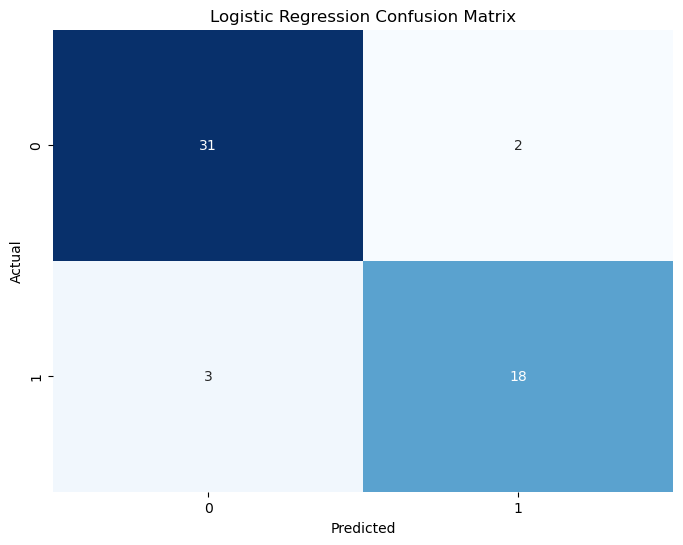


Naive Bayes Accuracy: 0.9074

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.97      0.93        33
           2       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



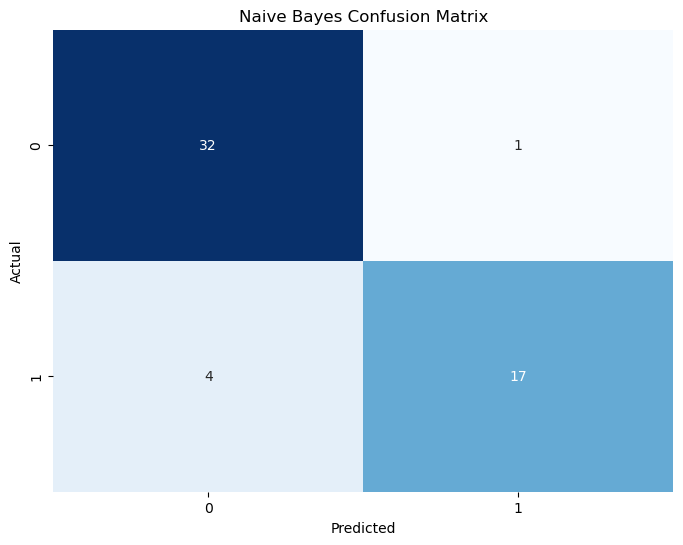


Random Forest Accuracy: 0.8333

Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.91      0.87        33
           2       0.83      0.71      0.77        21

    accuracy                           0.83        54
   macro avg       0.83      0.81      0.82        54
weighted avg       0.83      0.83      0.83        54



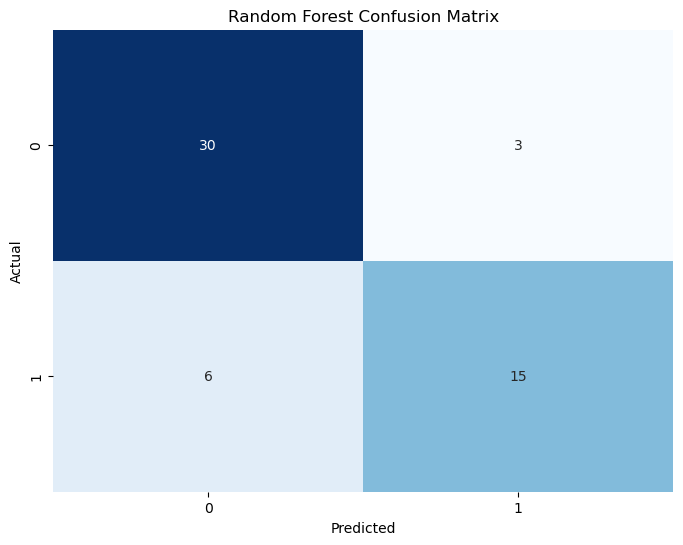


Decision Tree Accuracy: 0.6852

Decision Tree Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.64      0.71        33
           2       0.57      0.76      0.65        21

    accuracy                           0.69        54
   macro avg       0.69      0.70      0.68        54
weighted avg       0.72      0.69      0.69        54



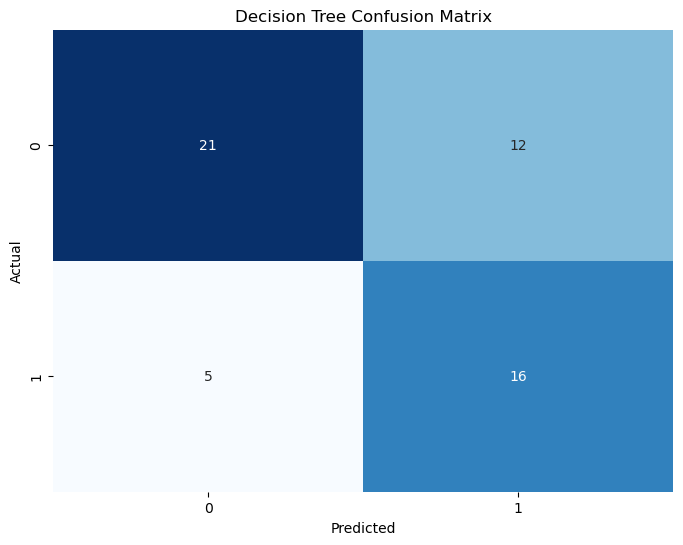


KNN Accuracy: 0.8148

KNN Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.91      0.86        33
           2       0.82      0.67      0.74        21

    accuracy                           0.81        54
   macro avg       0.82      0.79      0.80        54
weighted avg       0.82      0.81      0.81        54



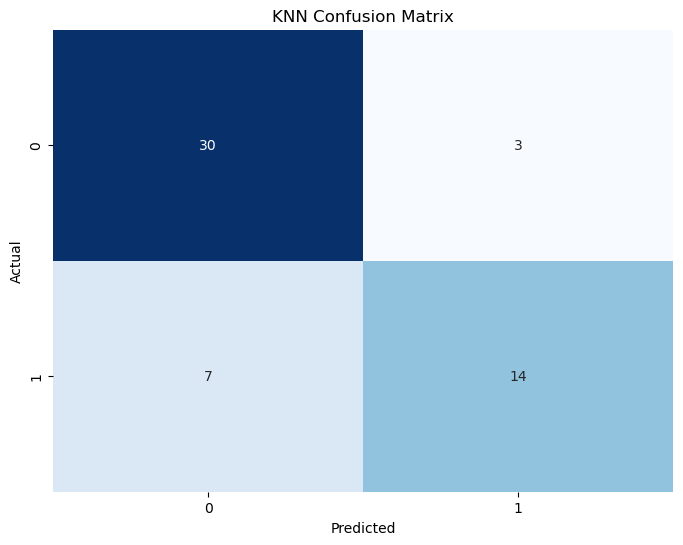


Bagging (Decision Tree) Accuracy: 0.7963

Bagging (Decision Tree) Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.88      0.84        33
           2       0.78      0.67      0.72        21

    accuracy                           0.80        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.79      0.80      0.79        54



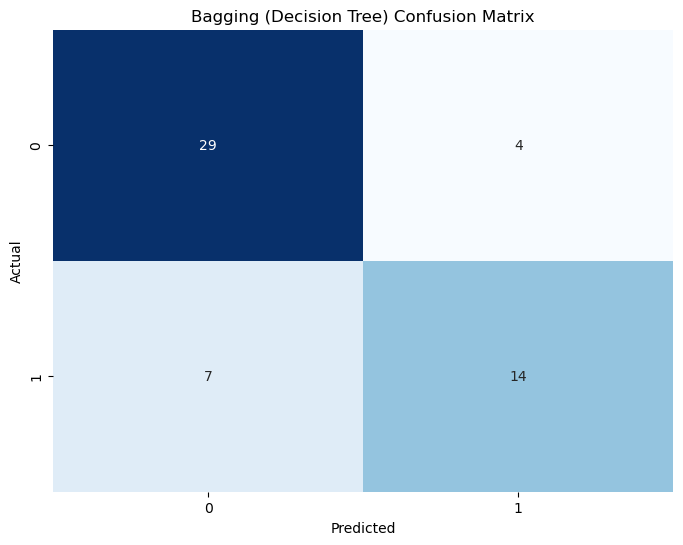


Boosting (AdaBoost with Decision Tree) Accuracy: 0.6852

Boosting (AdaBoost with Decision Tree) Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.67      0.72        33
           2       0.58      0.71      0.64        21

    accuracy                           0.69        54
   macro avg       0.68      0.69      0.68        54
weighted avg       0.70      0.69      0.69        54



C:\Users\bksri\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


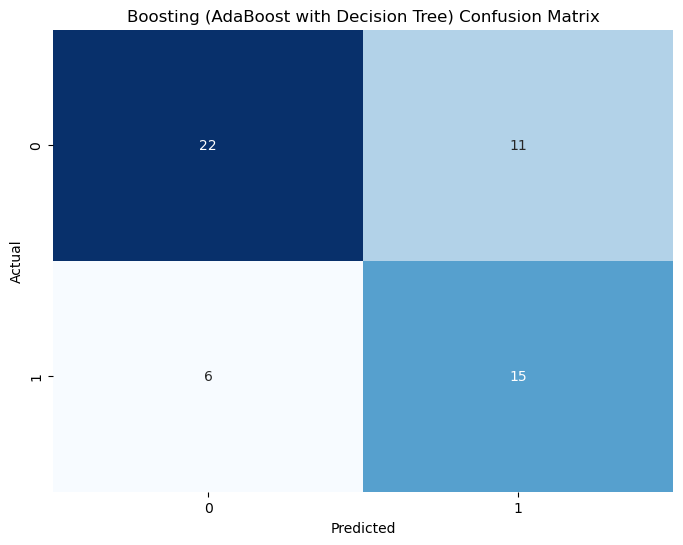

C:\Users\bksri\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\bksri\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\bksri\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\bksri\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\bks


Ensemble Model Accuracy: 0.9074

Ensemble Model Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.97      0.93        33
           2       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



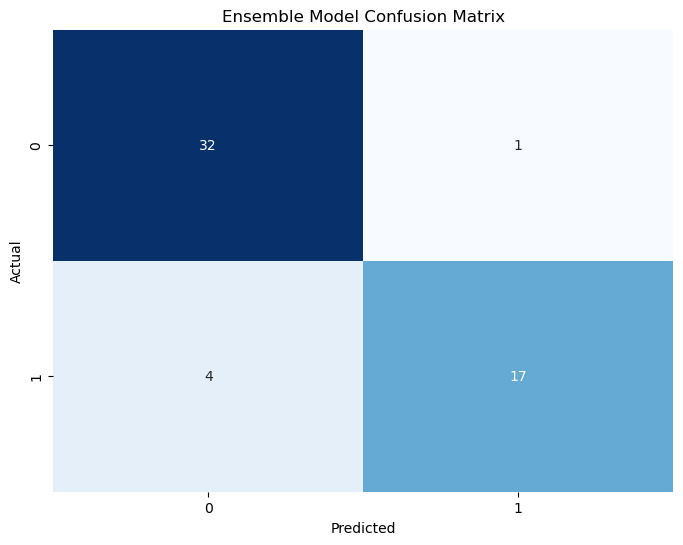

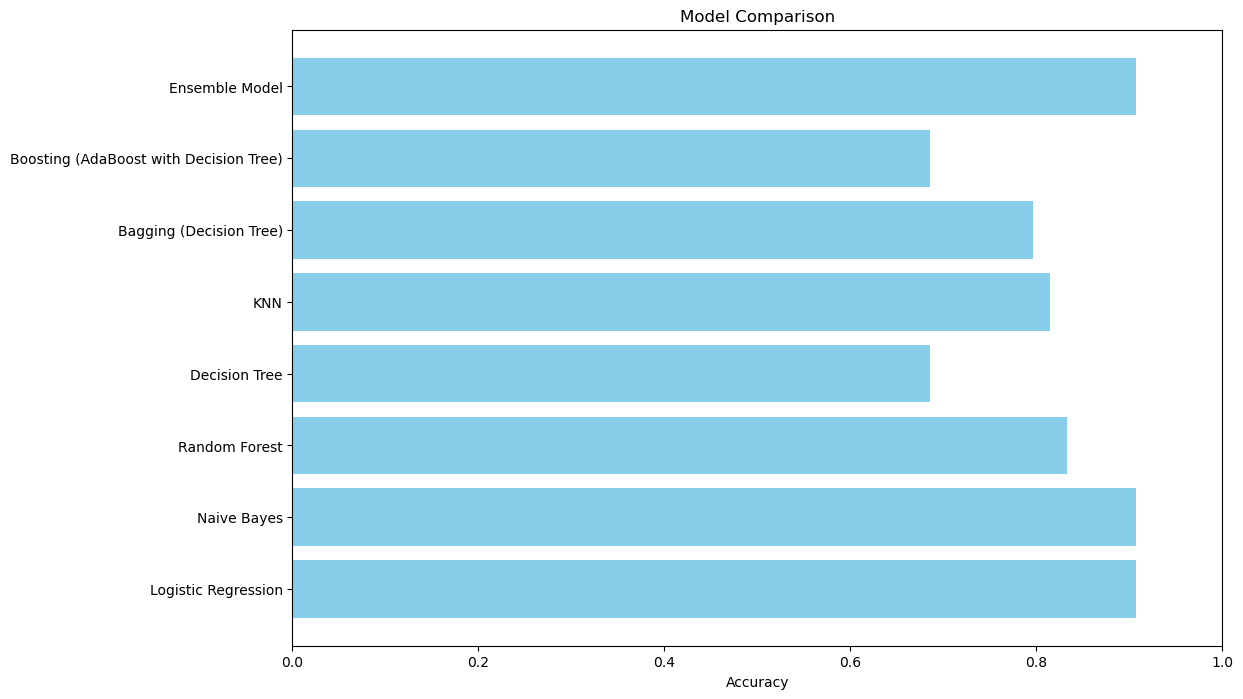

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('heart disease.csv')

# Assuming the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for models that require it
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Bagging (Decision Tree)": BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    "Boosting (AdaBoost with Decision Tree)": AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
}

# Function to train, predict, and evaluate a model
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    return accuracy

# Evaluate each individual model and store accuracy
accuracies = {}
for name, model in models.items():
    accuracies[name] = evaluate_model(name, model)

# Create the Stacking Classifier with all the models
stacking_model = StackingClassifier(
    estimators=[
        ('logistic', LogisticRegression()),
        ('naive_bayes', GaussianNB()),
        ('random_forest', RandomForestClassifier()),
        ('decision_tree', DecisionTreeClassifier()),
        ('knn', KNeighborsClassifier()),
        ('bagging', BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)),
        ('boosting', AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42))
    ],
    final_estimator=LogisticRegression()
)

# Evaluate the Stacking Classifier and add to accuracies
accuracies["Ensemble Model"] = evaluate_model("Ensemble Model", stacking_model)

# Plot model comparison
plt.figure(figsize=(12, 8))
plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.xlim(0, 1)  # Assuming accuracy is between 0 and 1
plt.show()


# ROC AUC

Logistic Regression ROC AUC: 0.9466
Naive Bayes ROC AUC: 0.9250
Random Forest ROC AUC: 0.8817
Decision Tree ROC AUC: 0.6905
KNN ROC AUC: 0.9235
Boosting ROC AUC: 0.9524


C:\Users\bksri\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Bagging ROC AUC: 0.8846


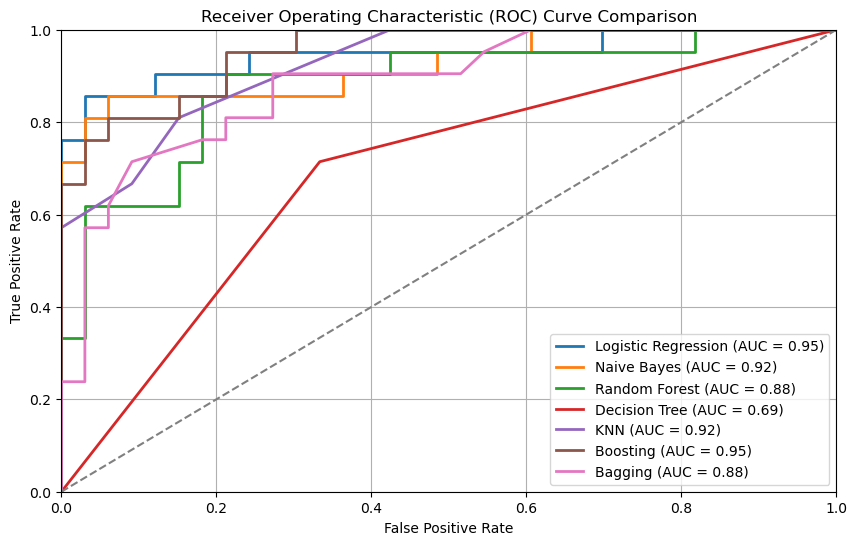

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("heart disease.csv")

# Identify target column (adjust if necessary)
X = data.drop('heart disease', axis=1)  # Replace 'heart disease' with the correct column name
y = data['heart disease']

# Convert target variable to binary if necessary
y = y.map({1: 0, 2: 1})  # Adjust based on your actual target variable values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize individual models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Boosting": AdaBoostClassifier(n_estimators=50, random_state=42),
    "Bagging": BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42)  # No 'base_estimator'
}

# Initialize lists to store results
roc_auc_scores = {}
fpr, tpr, roc_auc = {}, {}, {}

# Train each model and calculate ROC AUC
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    fpr[model_name], tpr[model_name], _ = roc_curve(y_test, y_proba)
    roc_auc[model_name] = auc(fpr[model_name], tpr[model_name])
    roc_auc_scores[model_name] = roc_auc[model_name]
    print(f"{model_name} ROC AUC: {roc_auc[model_name]:.4f}")

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))

for model_name in models.keys():
    plt.plot(fpr[model_name], tpr[model_name], lw=2, label=f'{model_name} (AUC = {roc_auc[model_name]:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# PREDICTION OF HEART DISEASE TYPE

In [17]:
heart_data=pd.read_csv('heart disease.csv')
print(heart_data['heart disease'].unique())

[2 1]


In [20]:
# Import necessary libraries (already done in your code)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('heart disease.csv')

# Assuming the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features for models that require it
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[
        ('logistic', LogisticRegression()),
        ('naive_bayes', GaussianNB()),
        ('random_forest', RandomForestClassifier()),
        ('decision_tree', DecisionTreeClassifier()),
        ('knn', KNeighborsClassifier()),
        ('bagging', BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)),
        ('boosting', AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, algorithm='SAMME', random_state=42))
    ],
    final_estimator=LogisticRegression()
)

# Train the Stacking Classifier
stacking_model.fit(X_train, y_train)

# Example new patient data
age = 65  # Patient's age
sex = 1  # 1 for male, 0 for female
chest_pain_type = 3  # Example: chest pain type (1 to 4)
resting_bp = 130  # Resting blood pressure
cholesterol = 250  # Serum cholesterol
fasting_bs = 0  # 1 if fasting blood sugar > 120 mg/dl, else 0
resting_ecg = 1  # Resting electrocardiographic results (0, 1, 2)
max_heart_rate = 150  # Maximum heart rate
exercise_angina = 0  # 1 if exercise induced angina, else 0
oldpeak = 2.3  # ST depression induced by exercise relative to rest
st_segment = 2  # ST segment (0, 1, 2)
major_vessels = 1  # Number of major vessels (0-3)
thal = 7  # Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect)

# Prepare new patient data for prediction
new_patient_data = [[age, sex, chest_pain_type, resting_bp, cholesterol, fasting_bs,
                     resting_ecg, max_heart_rate, exercise_angina, oldpeak,
                     st_segment, major_vessels, thal]]

# Create a DataFrame for the new patient data (match column names)
new_patient_data_df = pd.DataFrame(new_patient_data, columns=data.columns[:-1])

# Scale the new patient data using the same scaler
new_patient_data_scaled = scaler.transform(new_patient_data_df)

# Predict the heart disease type using the ensemble model
predicted_disease = stacking_model.predict(new_patient_data_scaled)

# Mapping the numerical prediction to the disease name
disease_mapping = {1: 'coronary artery disease', 2: 'pulmonary artery disease', 3: 'other disease'}
predicted_disease_name = disease_mapping.get(predicted_disease[0], "Unknown disease")

print(f"The predicted heart disease type is: {predicted_disease_name}")

The predicted heart disease type is: pulmonary artery disease
